In [1]:
import numpy as np
import matplotlib . pyplot as plt

import scipy . linalg as linalg

In [4]:
# in scipy : scipy . linalg .qr(A, mode =" economic ")
def qr_factor (A):
    """
    Computes a ( reduced ) QR - decomposition of a (mxn)-matrix with m >=n
    via Gram - Schmidt Algorithm assumed rank (A)=n.
    Parameters
    ----------
    A : (mxn ) matrix with m >=n, rank (A)=n
    Returns
    -------
    Q : (mxn ) with orthonormal columns
    R : (nxn ) upper triangular matrix
    """
    m, n = A. shape
    R = np. zeros ((n, n))
    Q = np. zeros ((m, n))
    R[0, 0] = np. linalg . norm (A[:, 0]) ### norm of (A[:, 0]) first column
    Q[:, 0] = A[:, 0] / R[0, 0] ## first column of Q = first column of A / norm(1st colm A) 
    for k in range (1, n):
        for l in range (0, k):
            R[l, k] = A[:, k] @ Q[:, l]
        q = A[:, k] - Q @ R[:, k]
        R[k, k] = np. linalg . norm (q)
        Q[:, k] = q / R[k, k]
    return Q, R

### The outer loop iterates over each column of A, except the first column (since the first column is used to initialize Q and R). The inner loop iterates over the previous columns of A, in order to orthogonalize the current column with respect to the previous columns.

### For each pair of columns (k and l), the code computes the inner product between the current column A[:, k] and the l-th column of Q. This inner product is stored in the R matrix at position (l, k). The code then subtracts the projection of A[:, k] onto the l-th column of Q from A[:, k], in order to obtain a new vector q that is orthogonal to all previous columns of Q.

### The norm of q is stored in the diagonal element R[k, k], and Q[:, k] is obtained by normalizing q with this norm.

In [9]:
### Find a NumPy function to generate a Vandermonde matrix A based on this grid.
def example_vander_legendre ( gridpoints , degree ): ###(m,n)
    grid = np. linspace (-1, 1, 5)
    A = np. vander (grid , degree , increasing = True )
    plt. figure (" Standard Monomials ")
    plt. plot (grid , A)
    plt. legend ( range (A. shape [1]) )
    Q, R = qr_factor (A)
    plt. figure (" Variant of Legendre Polynomials ")
    Q, R = qr_factor (A)
    plt. plot (grid , Q, "-")
    plt. legend ( range (Q. shape [1]) )
    plt. show ()
    return A, Q, R

In [7]:
def test_qr (A, Q, R, mode =" full "):
    print ("\ nTest 1: Q.TQ = I is",
    np. allclose (Q. transpose ()@Q , np. eye (A. shape [1]) ))  ### checking if QTQ == Identity matrix
    print ("\ nTest 2: QR = A is",
    np. allclose (Q@R , A))   #### Q * R == A

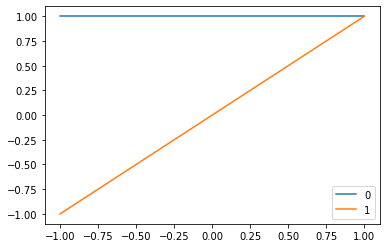

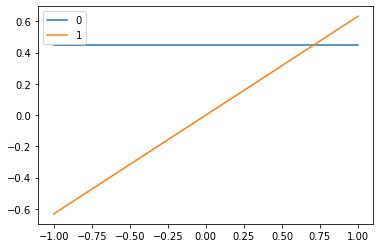

\ nTest 1: Q.TQ = I is True
\ nTest 2: QR = A is True


In [10]:
m, n = 5 , 2
A, Q, R = example_vander_legendre (m, n)
test_qr (A, Q, R)

In [ ]:
def poly_curve_fit (data , p, own = True ):
    """
    INPUT :
    numpy . ndarray data of shape (2,m) with
    data [0 ,:] = (z_1 , ... , z_m ) explanatory / independent variables
    data [1 ,:] = (y_1 , ... , y_m ) response / dependent variables
    list p = [p1 , p2 ,... , pn] determining the polynomial model
    f_c (z) = c1 * z^p1 + ... + cn * z^pn
    own : switch to use either our approach with ( reduced ) QR - decomposition
    or SciPy 's routine to solve the least squares problem
    OUTPUT :
    numpy . ndarray c of shape (n ,) such that
    c = argmin_c sum_i ( f_c( z_i ) - y_i)^2
    """
    # (a) assemble the vector b
    b = data [1 ,:]
    # (b) assemble the matrix A
    z_i = data [0 ,:][ np. newaxis ].T
    A = z_i **p
    # (c) determine c by solving using QR Decomposition
    if own == True :
        # " factor_qr "
        Q, R = linalg .qr(A)
        m, n = len(b), len(p)
        Q, R = Q [0:m ,0: n], R [0:n ,0: n]
        # " solve_qr "
        c = linalg . solve_triangular (R, Q.T @ b )
    else :
        c , res , rnk , s = linalg . lstsq (A,b)

    return c